**WINE DATA ANYLYSIS**

Dataset from: https://archive.ics.uci.edu/ml/datasets/Wine

**INTRODUCTION**

We will be using the dataset "wine", from the url: https://archive.ics.uci.edu/ml/datasets/wine/wine.data

The "wine" dataset contains the data of 13 attributes of wines, created from the same region of Italy, created from 3 different cultivars (cultivar 1, 2, and 3). A cultivar is a plant or fruit variety that has been cultivated for specific characteristics through selectively breeding. There is no information on what type of plant/fruit these cultivars are, therefore there is not enough information about the dataset to determine whether these 3 cultivars are 3 distinct plants/fruits, or 3 varieties of the same fruit/plant. After a chemical analysis has been performed on the wine, 13 chemical attributes, such as alcohol content, color intensity, hue, and amount of magnesium content, have been determined. With each of these 13 attributes, we will be able to create a classification model which predicts which of the 3 cultivars a wine originates from based on it’s chemical breakdown, answering the question we have divised for our project, “What cultivar does a wine belong to, based on it’s chemical breakdown?"

**Methods & Results**

describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.

your report should include code which:
1. loads data from the original source on the web (**COMPLETE**)
2. wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis
    - mostly clean and wrangled?
    - raw data does not include column titles
        - added titles, and converted categorical variable to a factor

3. performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis
    - Used ggpairs to determine which predictor variables are most useful for prediction by viewing correlation between each predictor variable and our Cultivar Categorical variable
    - after picking most correlated variables, we should compute some summary statistics
        - Feedback from proposal suggests to explore not just the mean, but to look at the min, max, standard deviation, etc

4. creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
5. performs the data analysis
    - performed initial split of data
    - performed cross validation and experimented with k values ranging from 1-50 to find the best k value for our model
        - 34 neighbours is best k value
    - created classification model and tested accuracy, with confusion matrix
    
6. creates a visualization of the analysis 
    - note: all tables and figure should have a figure/table number and a legend

In [1]:
set.seed(2022)
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
library(data.table)
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts(

Cultivar,Alcohol,Malic_Acid,Ash,Alcalinity_Of_Ash,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315_Of_Dilluted_Wines,Proline
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


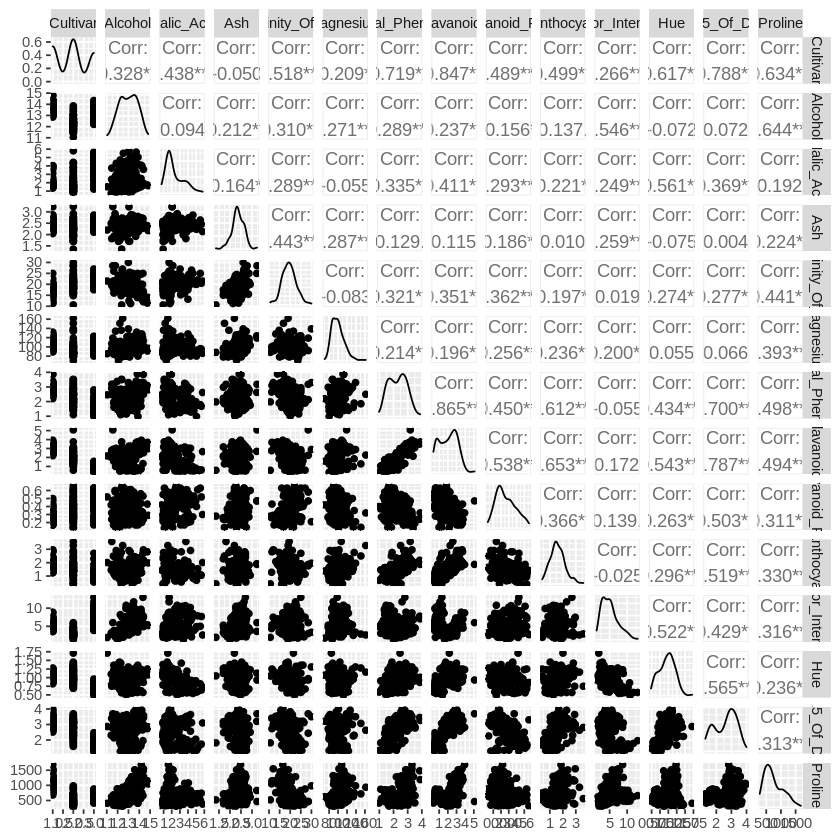

In [2]:
set.seed(2022)
options(repr.plot.height = 20, repr.plot.width = 20)

wine <- fread(url)

colnames(wine) <- c("Cultivar","Alcohol","Malic_Acid","Ash","Alcalinity_Of_Ash","Magnesium","Total_Phenols","Flavanoids","Nonflavanoid_Phenols","Proanthocyanins","Color_Intensity","Hue","OD280/OD315_Of_Dilluted_Wines","Proline")

head(wine)

ggpairs(wine)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9620855,5,0.011726983,Preprocessor1_Model01
2,accuracy,multiclass,0.9620855,5,0.011726983,Preprocessor1_Model02
3,accuracy,multiclass,0.9469858,5,0.014897224,Preprocessor1_Model03
4,accuracy,multiclass,0.9469858,5,0.014897224,Preprocessor1_Model04
5,accuracy,multiclass,0.9467009,5,0.019452925,Preprocessor1_Model05
6,accuracy,multiclass,0.9467009,5,0.019452925,Preprocessor1_Model06
7,accuracy,multiclass,0.9467009,5,0.019452925,Preprocessor1_Model07
8,accuracy,multiclass,0.9467009,5,0.019452925,Preprocessor1_Model08
9,accuracy,multiclass,0.9472503,5,0.009323972,Preprocessor1_Model09


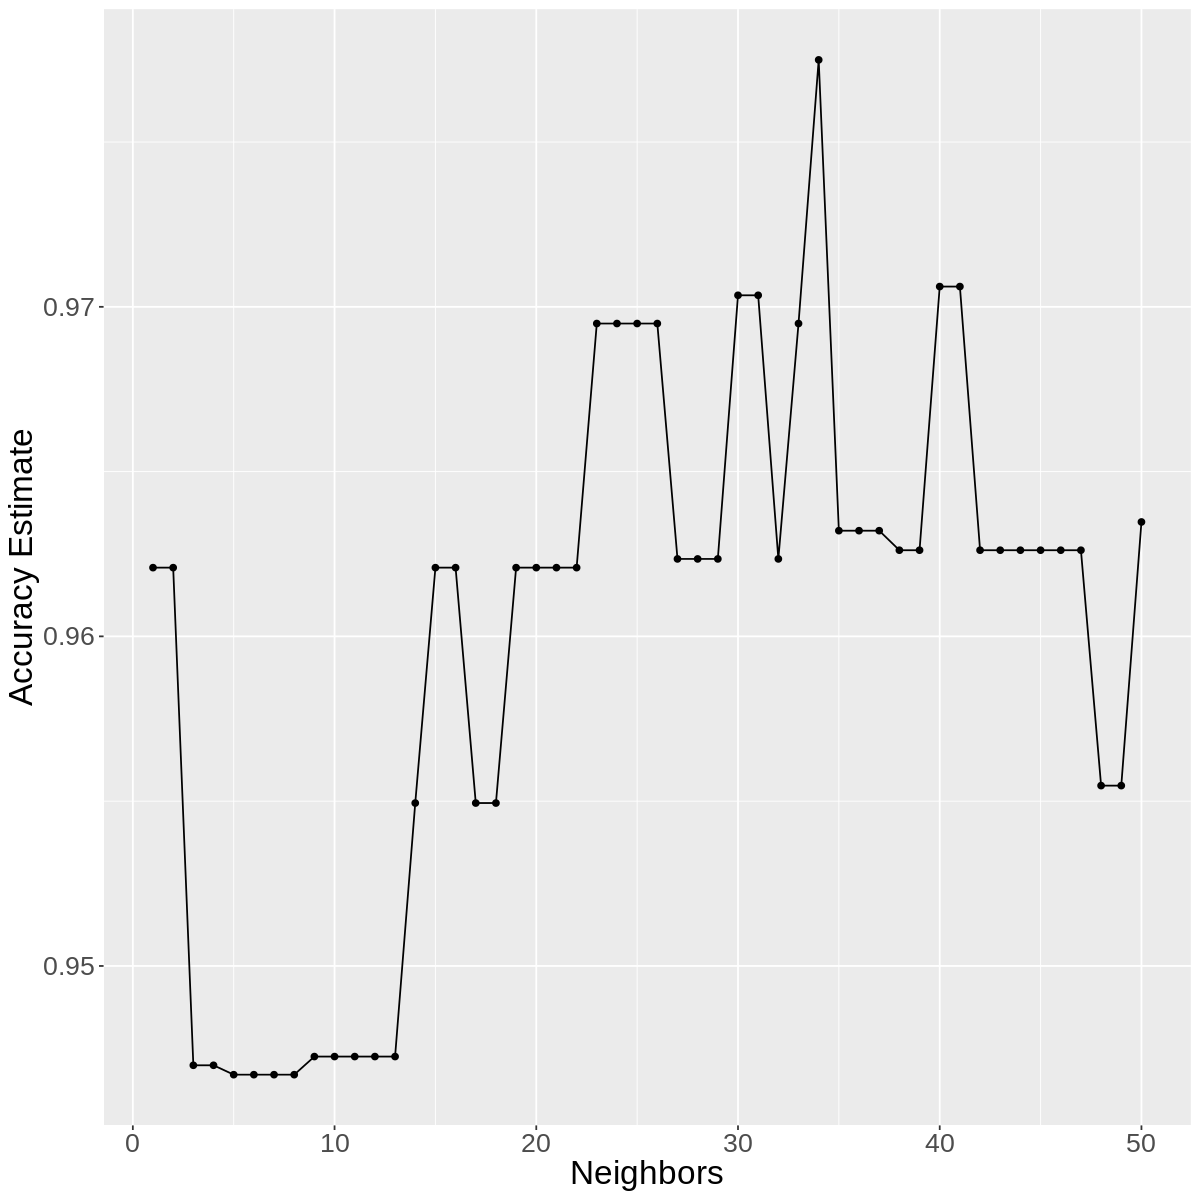

In [3]:
# data analysis
set.seed(2022)
options(repr.plot.height = 10, repr.plot.width = 10)

wine <- wine |>
    mutate(Cultivar = as_factor(Cultivar))

wine_split <- initial_split(wine, prop = 0.75, strata = Cultivar)
wine_training <- training(wine_split)
wine_testing <- testing(wine_split)

wine_vfold <- vfold_cv(wine_training, v = 5, strata = Cultivar)

wine_recipe <- recipe(Cultivar ~ ., data = wine_training) |>
            step_scale(all_predictors()) |>
            step_center(all_predictors())

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

knn_results <- workflow() |>
            add_recipe(wine_recipe) |>
            add_model(knn_tune) |>
            tune_grid(resamples = wine_vfold, grid = k_vals) |>
            collect_metrics() |>
            filter(.metric == "accuracy")

knn_results

cross_val_plot <- knn_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20)) 

cross_val_plot

In [4]:
best_k <- knn_results |>
        select(mean) |>
        max(mean)

best_k

ERROR: Error in as.vector(x, mode): cannot coerce type 'closure' to vector of type 'any'


In [5]:
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 34) |>
                  set_engine("kknn") |>
                  set_mode("classification")

wine_fit <- workflow() |>
  add_recipe(wine_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = wine_training)

wine_predictions <- predict(wine_fit, wine_testing) |> 
    bind_cols(wine_testing)

wine_acc <- wine_predictions |> 
    metrics(truth = Cultivar, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head()

wine_cm <- wine_predictions |> 
    conf_mat(truth = Cultivar, estimate = .pred_class)

wine_acc

wine_cm

.metric,.estimate
<chr>,<dbl>
accuracy,0.9777778
kap,0.9662921


          Truth
Prediction  1  2  3
         1 15  1  0
         2  0 17  0
         3  0  0 12

**Discussion:**
- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

**References**

At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references).
Make sure to cite the source of your data as well.